# Insurance fraud  in the Automobile insurance dataset

Here predicting the fraud in the Automobile insurance claim 

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
da=pd.read_csv('fraud_pred.csv')
da

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
data=da.drop(['_c39'],axis=1)

In [4]:
#dataset columns

data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
#number of columns and rows of dataset

data.shape

(1000, 39)

In [6]:
#finging null values in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#To get the descriptive analysis 

data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
#replacing ? with Nan value 

data = data.replace('?',np.NaN)

In [9]:
#to find a null value from columns

data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [10]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Data Preprocessing and Visualization

Since there are 3 columns with nan value 

In [11]:
#filling nan with mode()

data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

In [12]:
#filling nan with no

data['property_damage'].fillna('NO', inplace = True)

In [13]:
#filling nan with no
data['police_report_available'].fillna('NO', inplace = True)

In [14]:
#finding null value after filling the nan value
data.isnull().sum().any()

False

Uniariate Plot

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


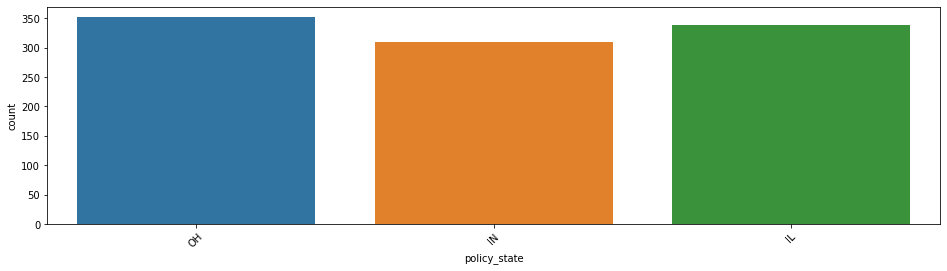

In [15]:
#policy state of there customers 

print(data['policy_state'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['policy_state'])

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


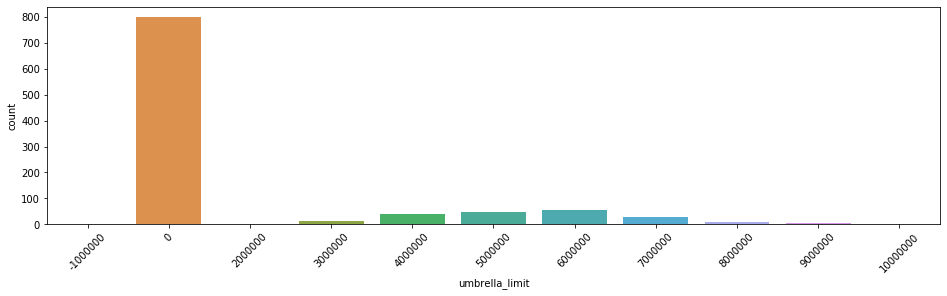

In [16]:
print(data['umbrella_limit'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['umbrella_limit'])

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


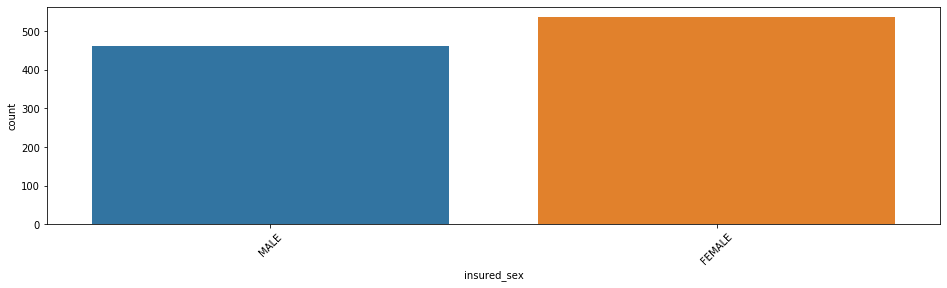

In [17]:
print(data['insured_sex'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['insured_sex'])

Total male and female of the fraud claim dataset

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


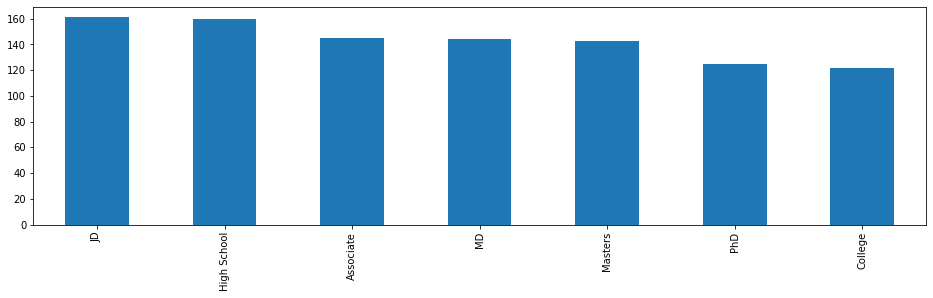

In [18]:
print(data['insured_education_level'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
data['insured_education_level'].value_counts().plot.bar()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


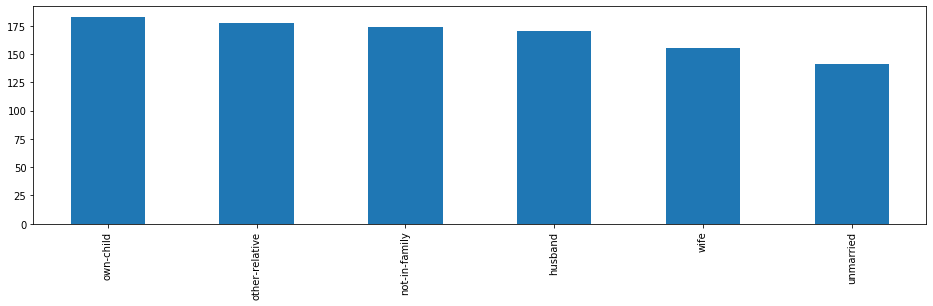

In [19]:
print(data['insured_relationship'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
data['insured_relationship'].value_counts().plot.bar()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


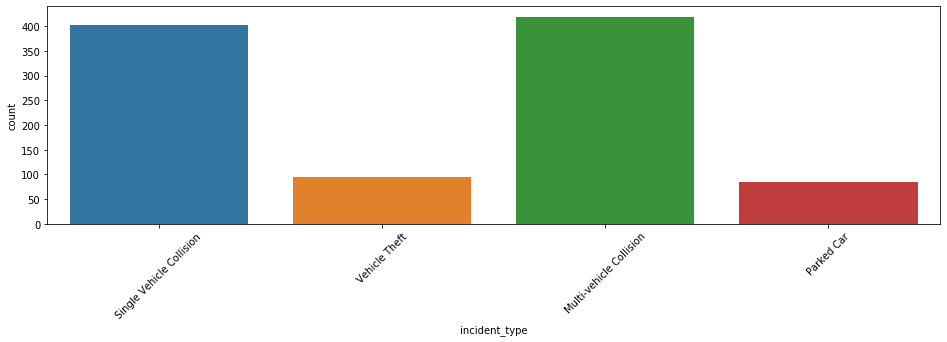

In [20]:
print(data['incident_type'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['incident_type'])

Top most Incident type are as follows

Multi-vehicle Collision     419,
Single Vehicle Collision    403,
Vehicle Theft                94,
Parked Car                   84.

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


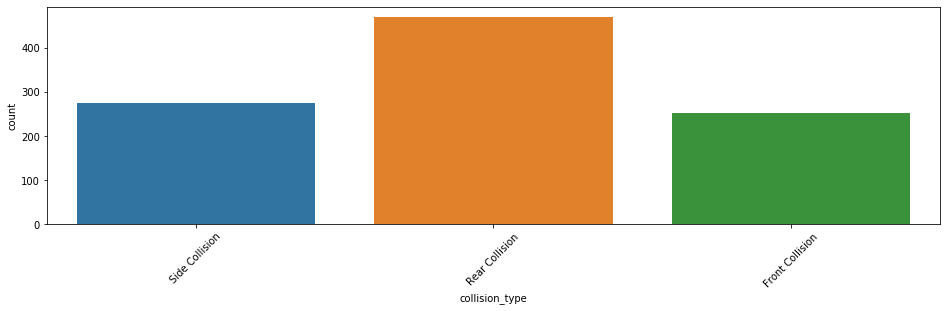

In [21]:
print(data['collision_type'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['collision_type'])

Most of the collision_type are as follows

Rear Collision     470,
Side Collision     276,
Front Collision    254.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


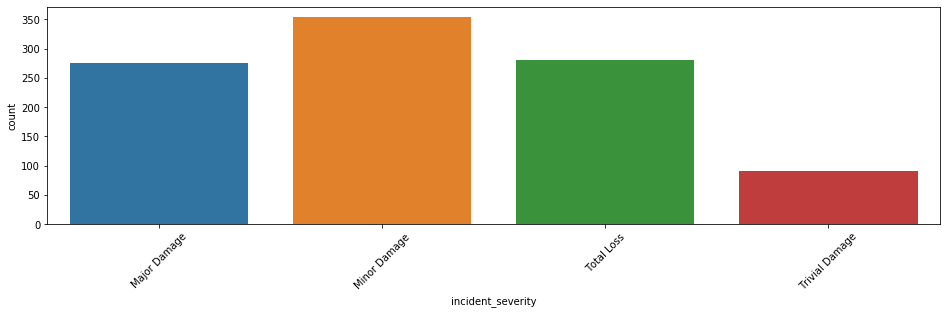

In [22]:
print(data['incident_severity'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['incident_severity'])

N    753
Y    247
Name: fraud_reported, dtype: int64


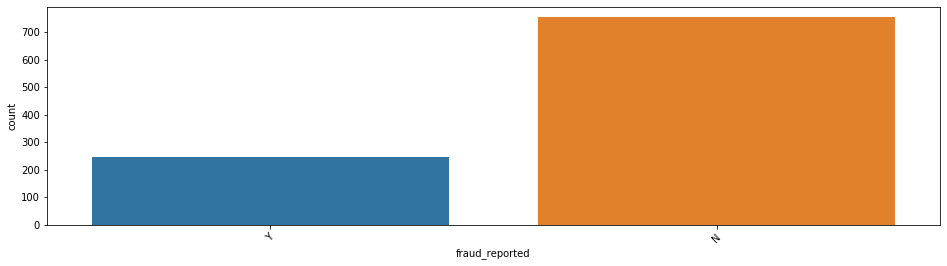

In [23]:
print(data['fraud_reported'].value_counts())
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['fraud_reported'])

Here the count shows us the fraud_reported

Bivariate Plot

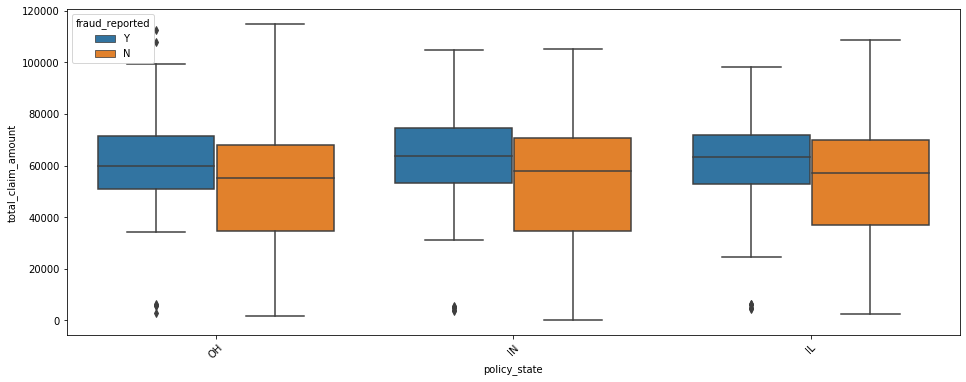

In [24]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sb.boxplot(x='policy_state',y='total_claim_amount',hue='fraud_reported',data=data)

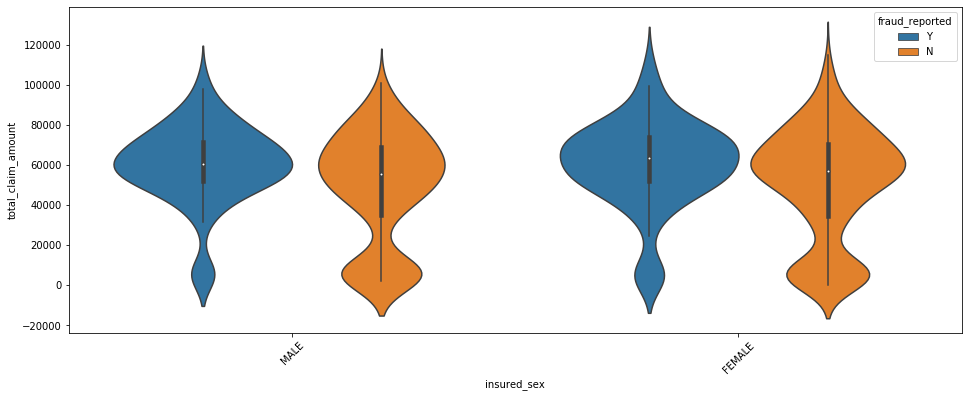

In [25]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sb.violinplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=data)

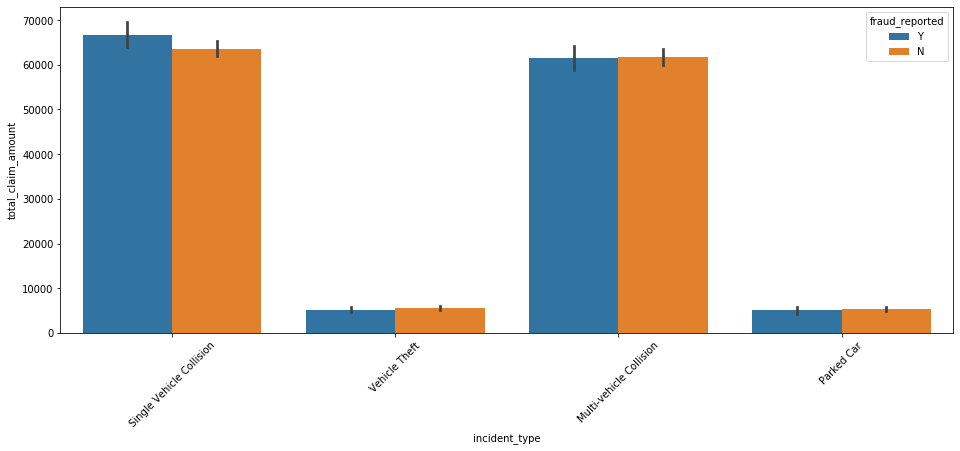

In [26]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sb.barplot(x='incident_type',y='total_claim_amount',hue='fraud_reported',data=data)

In [27]:
#droping the columns which doesn't help us in the modeling

data1=data.drop(['months_as_customer','age','policy_number',
                 'policy_bind_date','policy_csl','insured_occupation',
                 'insured_hobbies','incident_date','incident_state',
                 'incident_city','incident_location','auto_year'],axis=1)

In [28]:
data1

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,husband,53300,0,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,other-relative,0,0,...,0,0,NO,5070,780,780,3510,Mercedes,E400,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,own-child,35100,0,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,unmarried,48900,-62400,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,unmarried,66000,-46000,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,1000,1310.80,0,431289,FEMALE,Masters,unmarried,0,0,...,0,1,NO,87200,17440,8720,61040,Honda,Accord,N
996,IL,1000,1436.79,0,608177,FEMALE,PhD,wife,70900,0,...,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,N
997,OH,500,1383.49,3000000,442797,FEMALE,Masters,other-relative,35100,0,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
998,IL,2000,1356.92,5000000,441714,MALE,Associate,wife,0,0,...,0,1,YES,46980,5220,5220,36540,Audi,A5,N


In [29]:
#To find the object type to encode them

data1.dtypes==object

policy_state                    True
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                     True
insured_education_level         True
insured_relationship            True
capital-gains                  False
capital-loss                   False
incident_type                   True
collision_type                  True
incident_severity               True
authorities_contacted           True
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
witnesses                      False
police_report_available         True
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
auto_make                       True
auto_model                      True
fraud_reported                  True
d

In [30]:
col = ['policy_state','insured_sex','insured_education_level','insured_relationship',
       'incident_type','collision_type','incident_severity','authorities_contacted',
       'property_damage','police_report_available','auto_make','auto_model','fraud_reported']
#label encoding

le=LabelEncoder()
data1[col]=data1[col].apply(lambda x:le.fit_transform(x))
data1

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,2,1000,1406.91,0,466132,1,4,0,53300,0,...,1,2,1,71610,6510,13020,52080,10,1,1
1,1,2000,1197.22,5000000,468176,1,4,2,0,0,...,0,0,0,5070,780,780,3510,8,12,1
2,2,2000,1413.14,5000000,430632,0,6,3,35100,0,...,2,3,0,34650,7700,3850,23100,4,30,0
3,0,2000,1415.74,6000000,608117,0,6,4,48900,-62400,...,1,2,0,63400,6340,6340,50720,3,34,1
4,0,1000,1583.91,6000000,610706,1,0,4,66000,-46000,...,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1000,1310.80,0,431289,0,5,4,0,0,...,0,1,0,87200,17440,8720,61040,6,6,0
996,0,1000,1436.79,0,608177,0,6,5,70900,0,...,2,3,0,108480,18080,18080,72320,13,28,0
997,2,500,1383.49,3000000,442797,0,5,2,35100,0,...,2,3,1,67500,7500,7500,52500,11,19,0
998,0,2000,1356.92,5000000,441714,1,0,5,0,0,...,0,1,1,46980,5220,5220,36540,1,5,0


In [31]:
#data types after label encoding
data1.dtypes.any()==object

False

In [32]:
# the Correlation between the different variables

data1.corr()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
policy_state,1.000000,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.018506,0.074551,-0.030338,...,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_deductable,0.010033,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.022945,0.035212,-0.023544,...,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817
policy_annual_premium,0.012455,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.001925,-0.013738,0.023547,...,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
umbrella_limit,-0.029580,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.077495,-0.047268,-0.024056,...,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622
insured_zip,0.008777,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.002355,0.006303,0.049372,...,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,0.019368
insured_sex,-0.020481,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,0.002855,-0.020494,-0.021705,...,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.034327,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.023488,0.039912,0.041193,...,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808
insured_relationship,-0.018506,-0.022945,0.001925,0.077495,-0.002355,0.002855,-0.023488,1.000000,-0.019439,-0.064453,...,-0.001214,0.002362,-0.017471,0.002229,0.029014,0.007332,-0.006256,-0.027028,0.063671,0.021043
capital-gains,0.074551,0.035212,-0.013738,-0.047268,0.006303,-0.020494,0.039912,-0.019439,1.000000,-0.046904,...,0.055829,-0.017651,-0.012939,0.015980,0.025934,-0.000779,0.015836,0.052014,0.036569,-0.019173
capital-loss,-0.030338,-0.023544,0.023547,-0.024056,0.049372,-0.021705,0.041193,-0.064453,-0.046904,1.000000,...,-0.024418,-0.041330,-0.039256,-0.036060,-0.046060,-0.022863,-0.032665,-0.041658,-0.037288,-0.014863


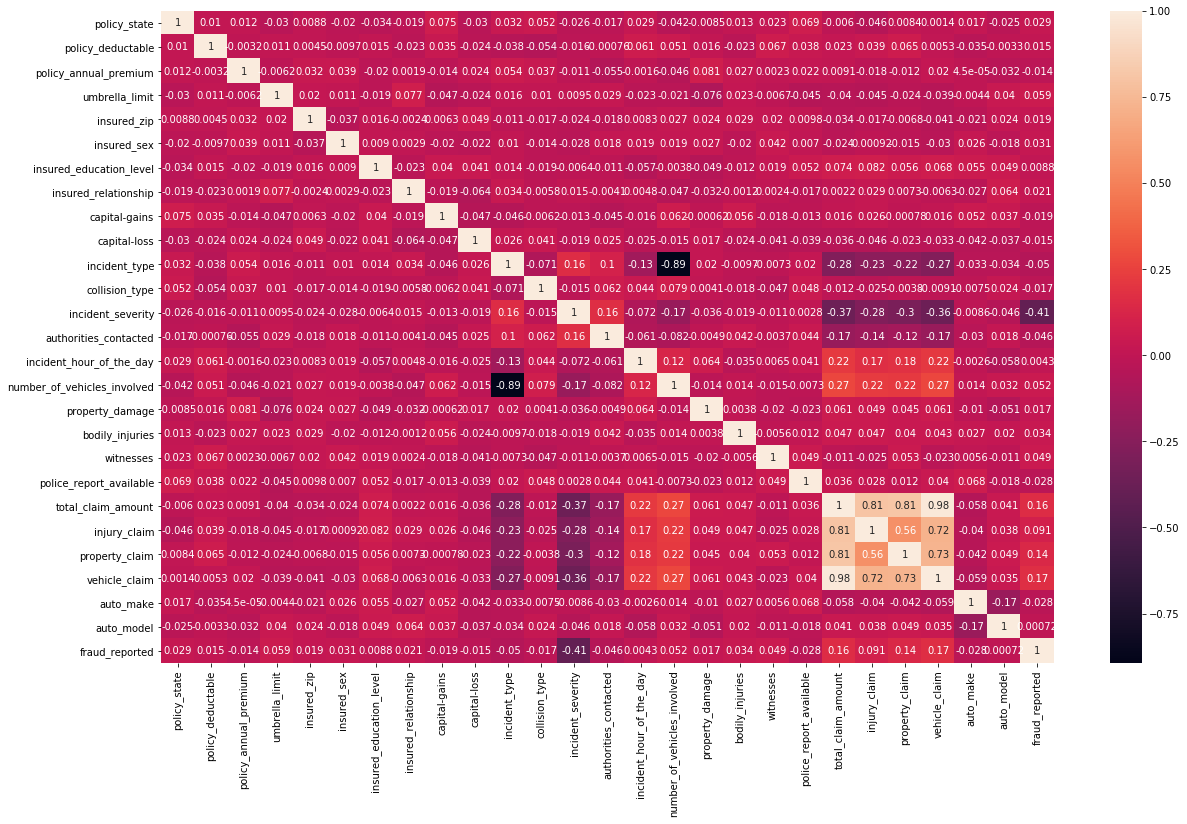

In [33]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(20,12))
sb.heatmap(data1.corr(),annot=True)

# Model Building


Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [34]:
x=data1.drop(['fraud_reported'],axis=1)
y=data1['fraud_reported']

In [35]:
#Getting the shape of the x and variables

print(x.shape)
print(y.shape)

(1000, 26)
(1000,)


In [36]:
#Preprocessing the data withStandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

In [38]:
#working on LogisticRegression 
#training and testing data using LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [39]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
75.6
----------------------------------------
Confusion Matrix:
[[172  17]
 [ 44  17]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       189
           1       0.50      0.28      0.36        61

    accuracy                           0.76       250
   macro avg       0.65      0.59      0.60       250
weighted avg       0.72      0.76      0.73       250



In [40]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [41]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
76.8
----------------------------------------
Confusion Matrix:
[[170  19]
 [ 39  22]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       189
           1       0.54      0.36      0.43        61

    accuracy                           0.77       250
   macro avg       0.67      0.63      0.64       250
weighted avg       0.75      0.77      0.75       250



cross valiadtion and prediction

In [42]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.768
STD score: 0.026758176320519324

cross prediction [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 

In [43]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)

In [44]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
71.2
----------------------------------------
Confusion Matrix:
[[147  42]
 [ 30  31]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       189
           1       0.42      0.51      0.46        61

    accuracy                           0.71       250
   macro avg       0.63      0.64      0.63       250
weighted avg       0.73      0.71      0.72       250



cross valiadtion and prediction

In [45]:
#cross valiadtion
score=cross_val_score(dtc,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(dtc,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.7060000000000001
STD score: 0.022671568097509236

cross prediction [1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0

In [46]:
#working on AdaBoostClassifier 
#training and testing data using AdaBoostClassifier

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)

In [47]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
74.8
----------------------------------------
Confusion Matrix:
[[162  27]
 [ 36  25]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       189
           1       0.48      0.41      0.44        61

    accuracy                           0.75       250
   macro avg       0.65      0.63      0.64       250
weighted avg       0.74      0.75      0.74       250



In [48]:
#working on SVC 
#training and testing data using SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [49]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
76.4
----------------------------------------
Confusion Matrix:
[[180   9]
 [ 50  11]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       189
           1       0.55      0.18      0.27        61

    accuracy                           0.76       250
   macro avg       0.67      0.57      0.57       250
weighted avg       0.73      0.76      0.72       250



cross valiadtion and prediction

In [50]:
#cross valiadtion
score=cross_val_score(svc,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(svc,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.75
STD score: 0.021679483388678818

cross prediction [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

# Grid Search

GridSearchCV for the best model

In [51]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

# Saving the model with joblib

In [52]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'inc_fraud.pkl')

['inc_fraud.pkl']

# conclusion


Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib